In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image

In [ ]:
pip install tensorflow keras matplotlib numpy pillow


--2024-12-10 06:19:10--  https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99389 (97K) [image/jpeg]
Saving to: ‘sample_image.jpg’

sample_image.jpg    100%[===================>]  97.06K  --.-KB/s    in 0.1s    

2024-12-10 06:19:11 (974 KB/s) - ‘sample_image.jpg’ saved [99389/99389]

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


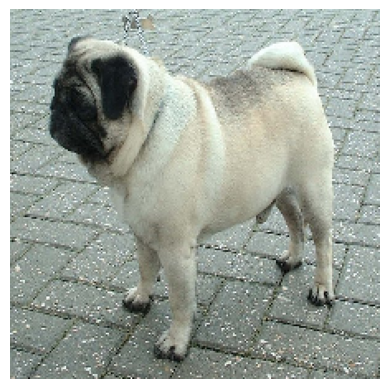

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1: pug (1.00)
2: Norwegian_elkhound (0.00)
3: chow (0.00)
4: French_bulldog (0.00)
5: keeshond (0.00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Download a sample image (if you don't have one)
!wget https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg -O sample_image.jpg

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load and preprocess the image
img_path = 'sample_image.jpg'  # Use the downloaded image
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to a numpy array and preprocess it for ResNet50
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
preds = model.predict(img_array)

# Decode the predictions to get human-readable labels
decoded_preds = decode_predictions(preds, top=5)
for i, (imagenet_id, label, score) in enumerate(decoded_preds[0]):
    print(f"{i + 1}: {label} ({score:.2f})")




In [ ]:
model = tf.keras.applications.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    print(img_array.shape)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    print(img_array_expanded_dims.shape)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
!wget https://raw.githubusercontent.com/Jasonlee1995/ImageNet-1K/main/ImageNet_class_index.json


--2024-12-10 06:19:27--  https://raw.githubusercontent.com/Jasonlee1995/ImageNet-1K/main/ImageNet_class_index.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47366 (46K) [text/plain]
Saving to: ‘ImageNet_class_index.json’

ImageNet_class_inde 100%[===================>]  46.26K  --.-KB/s    in 0.008s  

2024-12-10 06:19:27 (5.59 MB/s) - ‘ImageNet_class_index.json’ saved [47366/47366]



In [ ]:
file_path = '/path/to/your/image/imagenet_class_index.json'



In [ ]:
!ls


ImageNet_class_index.json  sample_data	sample_image.jpg


In [ ]:
import json

# Open the ImageNet class index file
with open('ImageNet_class_index.json', 'r') as f:
    class_index = json.load(f)

# Print an example entry to verify the contents
print(class_index['0'])  # Example output: ['n01440764', 'tench']


['n01440764', 'tench']


In [ ]:
import json
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the ImageNet class index
with open('ImageNet_class_index.json', 'r') as f:
    class_index = json.load(f)

# Load and preprocess the image
img_path = 'sample_image.jpg'  # Replace with your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Make predictions
preds = model.predict(img_array)
predicted_class = np.argmax(preds[0])

# Decode the prediction
label = class_index[str(predicted_class)][1]
print(f"Predicted Class: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Class: pug


In [ ]:
# Print the prediction and the confidence score
confidence_score = np.max(preds[0])  # The highest probability value
print(f"Predicted Class: {label} with Confidence: {confidence_score:.2f}")


Predicted Class: pug with Confidence: 1.00


In [ ]:
import os
print(os.getcwd())  # Prints the current working directory
print(os.listdir())  # Lists all files in the current directory


/content
['.config', 'ImageNet_class_index.json', 'sample_image.jpg', 'sample_data']


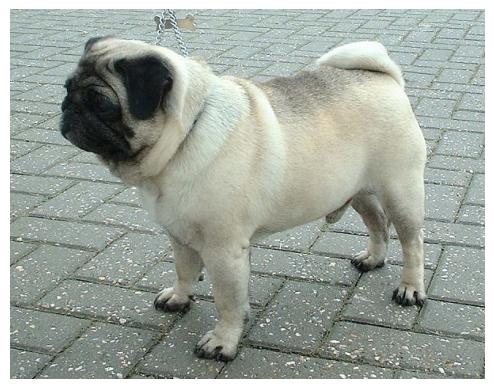

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1: pug (n02110958) - Confidence: 1.00
2: Norwegian_elkhound (n02091467) - Confidence: 0.00
3: chow (n02112137) - Confidence: 0.00
4: French_bulldog (n02108915) - Confidence: 0.00
5: keeshond (n02112350) - Confidence: 0.00


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the ImageNet class index
with open('ImageNet_class_index.json', 'r') as f:
    class_index = json.load(f)

# Function to prepare the image for prediction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Image path (use sample_image.jpg)
img_path = 'sample_image.jpg'

# Display the image
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()

# Prepare the image
preprocessed_image = prepare_image(img_path)

# Make predictions
predictions = model.predict(preprocessed_image)

# Decode the top 5 predictions
top_predictions = predictions[0].argsort()[-5:][::-1]

# Display the top 5 predictions with confidence scores
results = [(class_index[str(i)][0], class_index[str(i)][1], predictions[0][i]) for i in top_predictions]

# Print the results
for i, (imagenet_id, label, score) in enumerate(results):
    print(f"{i + 1}: {label} ({imagenet_id}) - Confidence: {score:.2f}")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving python.jpg to python.jpg


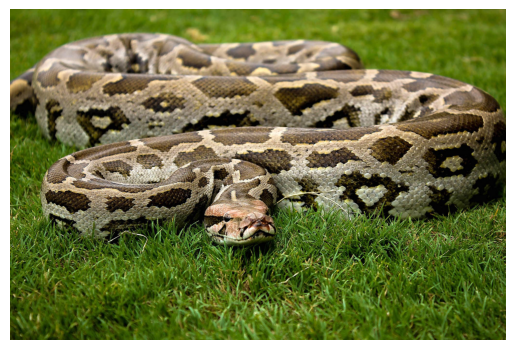

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1: rock_python (n01744401) - Confidence: 0.79
2: boa_constrictor (n01742172) - Confidence: 0.08
3: hognose_snake (n01729322) - Confidence: 0.04
4: bullfrog (n01641577) - Confidence: 0.03
5: night_snake (n01740131) - Confidence: 0.01


In [ ]:

import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the ImageNet class index
with open('ImageNet_class_index.json', 'r') as f:
    class_index = json.load(f)

# Function to prepare the image for prediction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Path to the uploaded image
img_path = 'python.jpg'

# Display the image
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()

# Prepare the image
preprocessed_image = prepare_image(img_path)

# Make predictions
predictions = model.predict(preprocessed_image)

# Decode the top 5 predictions
top_predictions = predictions[0].argsort()[-5:][::-1]

# Display the top 5 predictions with confidence scores
results = [(class_index[str(i)][0], class_index[str(i)][1], predictions[0][i]) for i in top_predictions]

# Print the results
for i, (imagenet_id, label, score) in enumerate(results):
    print(f"{i + 1}: {label} ({imagenet_id}) - Confidence: {score:.2f}")



Saving image3.jpg to image3.jpg

Processing image: image3.jpg


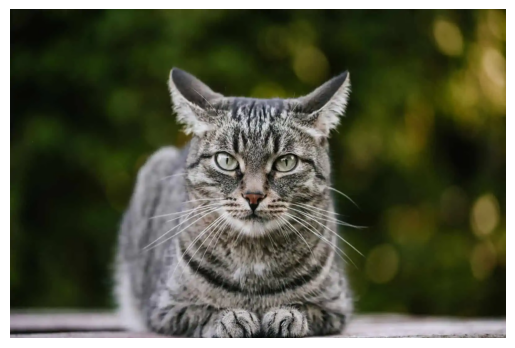

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1: tiger_cat - Confidence: 0.47
2: lynx - Confidence: 0.30
3: tabby - Confidence: 0.15
4: Egyptian_cat - Confidence: 0.02
5: tiger - Confidence: 0.02


In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load the ImageNet class index
import json
with open('ImageNet_class_index.json', 'r') as f:
    class_index = json.load(f)

# Function to prepare the image for prediction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Upload images
uploaded = files.upload()

# Loop through uploaded files and make predictions
for filename in uploaded.keys():
    print(f"\nProcessing image: {filename}")
    try:
        # Display the image
        img = image.load_img(filename)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Prepare and predict
        img_array = prepare_image(filename)
        predictions = model.predict(img_array)

        # Decode the top 5 predictions
        top_predictions = predictions[0].argsort()[-5:][::-1]
        results = [(class_index[str(i)][1], predictions[0][i]) for i in top_predictions]

        # Print the results
        for i, (label, score) in enumerate(results):
            print(f"{i + 1}: {label} - Confidence: {score:.2f}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')


21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Saving image3.jpg to image3 (1).jpg

Processing image: image3 (1).jpg


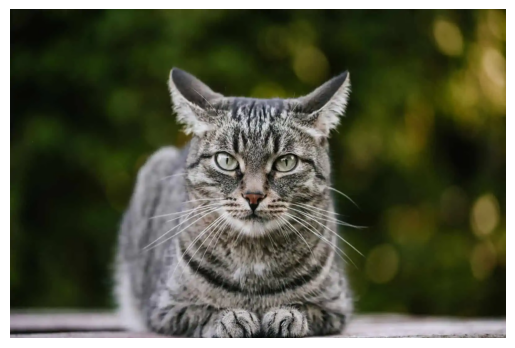

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1: tiger_cat - Confidence: 0.47
2: lynx - Confidence: 0.30
3: tabby - Confidence: 0.15
4: Egyptian_cat - Confidence: 0.02
5: tiger - Confidence: 0.02


In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load the ImageNet class index
import json
with open('ImageNet_class_index.json', 'r') as f:
    class_index = json.load(f)

# Function to prepare the image for prediction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Upload images
uploaded = files.upload()

# Loop through uploaded files and make predictions
for filename in uploaded.keys():
    print(f"\nProcessing image: {filename}")
    try:
        # Display the image
        img = image.load_img(filename)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Prepare and predict
        img_array = prepare_image(filename)
        predictions = model.predict(img_array)

        # Decode the top 5 predictions
        top_predictions = predictions[0].argsort()[-5:][::-1]
        results = [(class_index[str(i)][1], predictions[0][i]) for i in top_predictions]

        # Print the results
        for i, (label, score) in enumerate(results):
            print(f"{i + 1}: {label} - Confidence: {score:.2f}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")


In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet')

# Save the model to a file
model.save("resnet50_model.h5")
print("ResNet50 model saved as resnet50_model.h5")


ResNet50 model saved as resnet50_model.h5


In [ ]:

pip install --upgrade tensorflow



SyntaxError: invalid syntax (<ipython-input-22-7c681a54a853>, line 1)

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet')

# Save the model to a file
model.save("resnet50_model.h5")
print("ResNet50 model saved as resnet50_model.h5")


ResNet50 model saved as resnet50_model.h5


In [ ]:
from google.colab import files
files.download('resnet50_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>